In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pickle

In [147]:
runs = [
    ("model_bigdataset_100_relu", "bigdataset_100_dict.pickle"),
    ("model_bigdataset_100_tanh", "bigdataset_100_dict.pickle"),
    ("model_bigdataset_100_sigmoid", "bigdataset_100_dict.pickle"),
    ("model_bigdataset_1000_relu", "bigdataset_1000_dict.pickle"),
    ("model_bigdataset_1000_tanh", "bigdataset_1000_dict.pickle"),
    ("model_bigdataset_1000_sigmoid", "bigdataset_1000_dict.pickle"),   
    ("model_bigdataset_5000_relu", "bigdataset_5000_dict.pickle"),
    ("model_bigdataset_5000_tanh", "bigdataset_5000_dict.pickle"),
    ("model_bigdataset_5000_sigmoid", "bigdataset_5000_dict.pickle"),   
    ("model_bigdataset_10000_relu", "bigdataset_10000_dict.pickle"),
    ("model_bigdataset_10000_tanh", "bigdataset_10000_dict.pickle"),
    ("model_bigdataset_10000_sigmoid", "bigdataset_10000_dict.pickle"),   
    ("model_bigdataset_20000_relu", "bigdataset_20000_dict.pickle"),
    ("model_bigdataset_20000_tanh", "bigdataset_20000_dict.pickle"),
    ("model_bigdataset_20000_sigmoid", "bigdataset_20000_dict.pickle"),   
]

In [148]:
results = {}

count = 0
for model, dict_notes in runs:
    count+=0.1
    perplexity = count
    results[model] = perplexity
    
list(results.items())

perplexity by model


[('model_bigdataset_100_relu', 0.1),
 ('model_bigdataset_100_tanh', 0.2),
 ('model_bigdataset_100_sigmoid', 0.30000000000000004),
 ('model_bigdataset_1000_relu', 0.4),
 ('model_bigdataset_1000_tanh', 0.5),
 ('model_bigdataset_1000_sigmoid', 0.6),
 ('model_bigdataset_5000_relu', 0.7),
 ('model_bigdataset_5000_tanh', 0.7999999999999999),
 ('model_bigdataset_5000_sigmoid', 0.8999999999999999),
 ('model_bigdataset_10000_relu', 0.9999999999999999),
 ('model_bigdataset_10000_tanh', 1.0999999999999999),
 ('model_bigdataset_10000_sigmoid', 1.2),
 ('model_bigdataset_20000_relu', 1.3),
 ('model_bigdataset_20000_tanh', 1.4000000000000001),
 ('model_bigdataset_20000_sigmoid', 1.5000000000000002)]

In [149]:
from collections import defaultdict

results_by_model = defaultdict(lambda: {})
for model, perplexity in results.items():
    name = model.split('_')[-2]
    activation_f = model.split('_')[-1]
    results_by_model[name][activation_f] =  perplexity
    
df = pd.DataFrame(results_by_model)
df

,100,1000,5000,10000,20000
relu,0.1,0.4,0.7,1.0,1.3
tanh,0.2,0.5,0.8,1.1,1.4
sigmoid,0.3,0.6,0.9,1.2,1.5


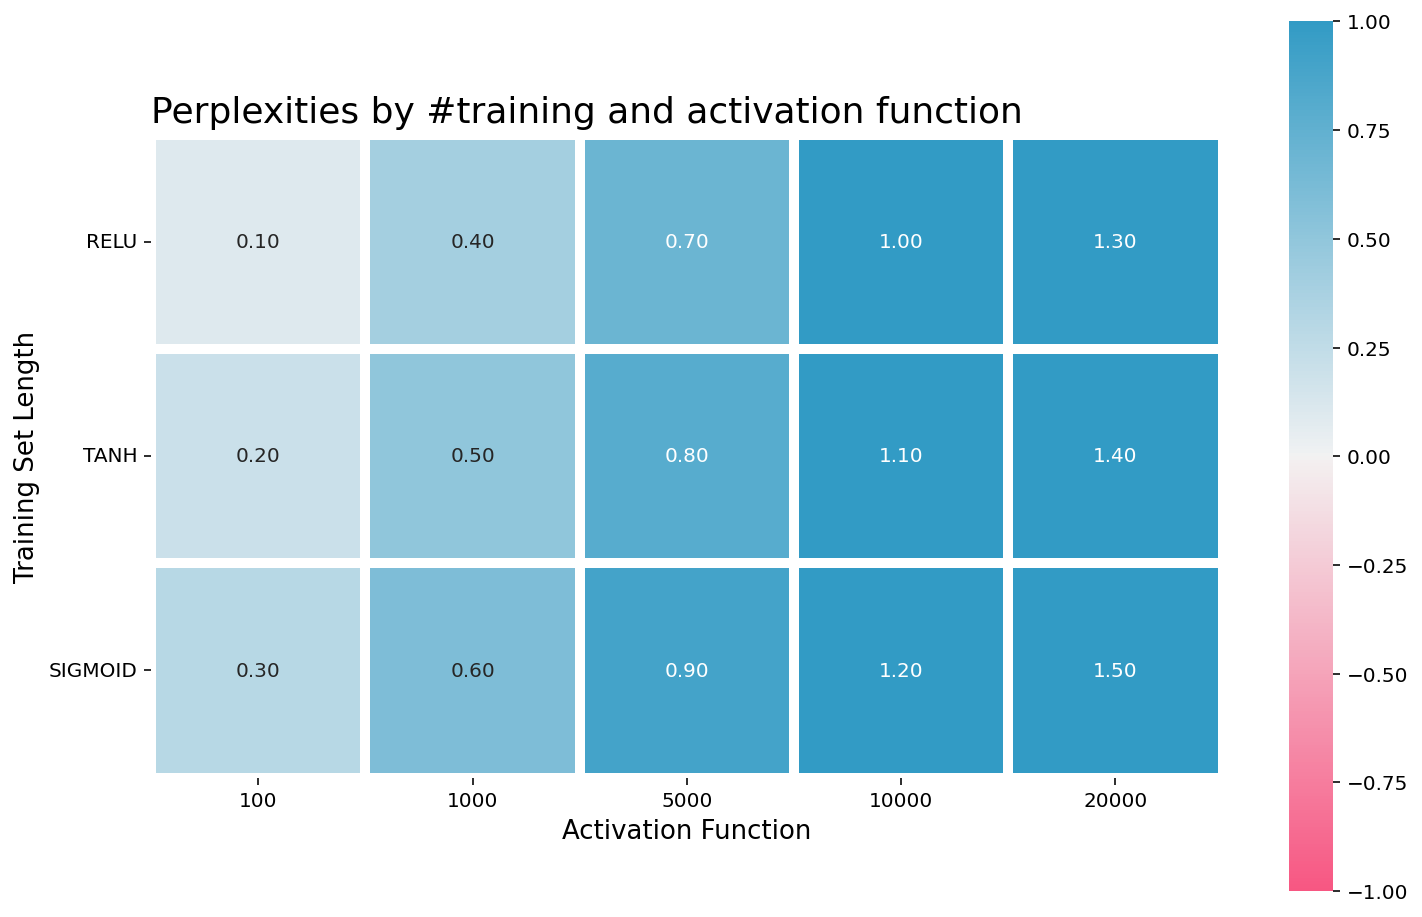

In [150]:
fig, ax = plt.subplots(figsize=(12, 10))
cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
sb.heatmap(df, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in df.index]
xticks = [i.upper() for i in df.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'Perplexities by #training and activation function'
plt.title(title, loc='left', fontsize=18)
plt.ylabel('Training Set Length', fontsize = 13)
plt.xlabel('Activation Function', fontsize = 13)
plt.show()